# Mental Health Disorder Analysis

source: <a href='https://www.kaggle.com/datasets/thedevastator/uncover-global-trends-in-mental-health-disorder'>Kaggle: Global Trends in Mental Health Disorder</a>

In [199]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
csv = pd.read_csv("dataset/Mental health Depression disorder Data.csv", nrows=6468)
df = pd.DataFrame(csv)

In [201]:
df

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...,...
6463,6463,Zimbabwe,ZWE,2013,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
6464,6464,Zimbabwe,ZWE,2014,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470
6465,6465,Zimbabwe,ZWE,2015,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751
6466,6466,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269


In [202]:
world = gpd.read_file('dataset/natural_earth/ne_110m_admin_0_countries.shp')
merged = world.merge(df, how='left', left_on='BRK_A3', right_on='Code')

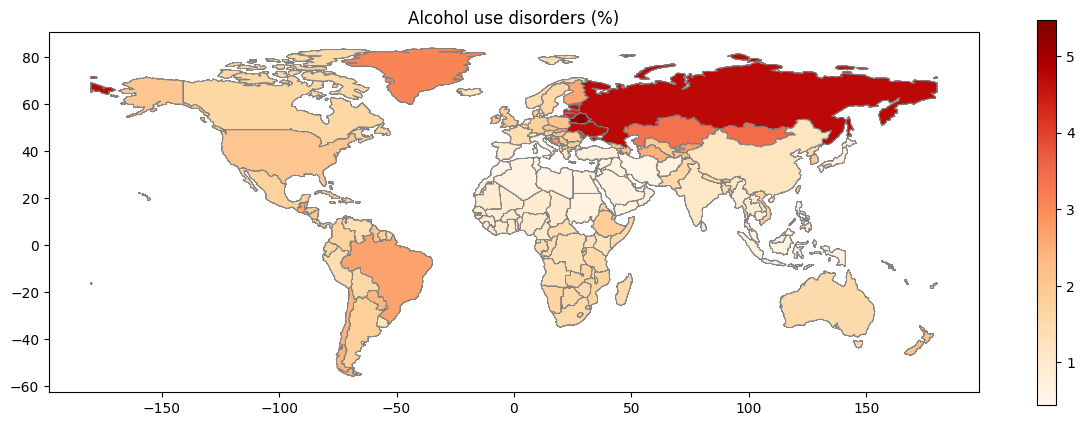

In [203]:
fig, ax = plt.subplots(figsize=(15, 5))

merged.plot(column='Alcohol use disorders (%)', cmap='OrRd', linewidth=0.6, ax=ax, edgecolor='0.5', legend=True)

plt.title('Alcohol use disorders (%)')
plt.show()

In [204]:
df.value_counts(df['Year']).sort_index()

Year
1990    231
1991    231
1992    231
1993    231
1994    231
1995    231
1996    231
1997    231
1998    231
1999    231
2000    231
2001    231
2002    231
2003    231
2004    231
2005    231
2006    231
2007    231
2008    231
2009    231
2010    231
2011    231
2012    231
2013    231
2014    231
2015    231
2016    231
2017    231
Name: count, dtype: int64

In [205]:
df_2009 = df[df['Year'] == 2009]
df_2009.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
19,19,Afghanistan,AFG,2009,0.164932,0.704925,0.095166,4.861533,2.543884,4.129972,0.661185
47,47,Albania,ALB,2009,0.198905,0.702783,0.157738,3.391018,0.498324,2.206033,1.824955
75,75,Algeria,DZA,2009,0.196795,0.814617,0.202695,5.037067,1.654478,3.616783,0.661914
103,103,American Samoa,ASM,2009,0.249748,0.468359,0.180675,3.312584,0.763178,2.937727,1.134180
131,131,Andean Latin America,NaN,2009,0.198671,0.879161,0.331577,4.259968,0.670636,2.607964,1.590828


In [206]:
world = gpd.read_file('dataset/natural_earth/ne_110m_admin_0_countries.shp')
merged = world.merge(df_2009, how='left', left_on='BRK_A3', right_on='Code')

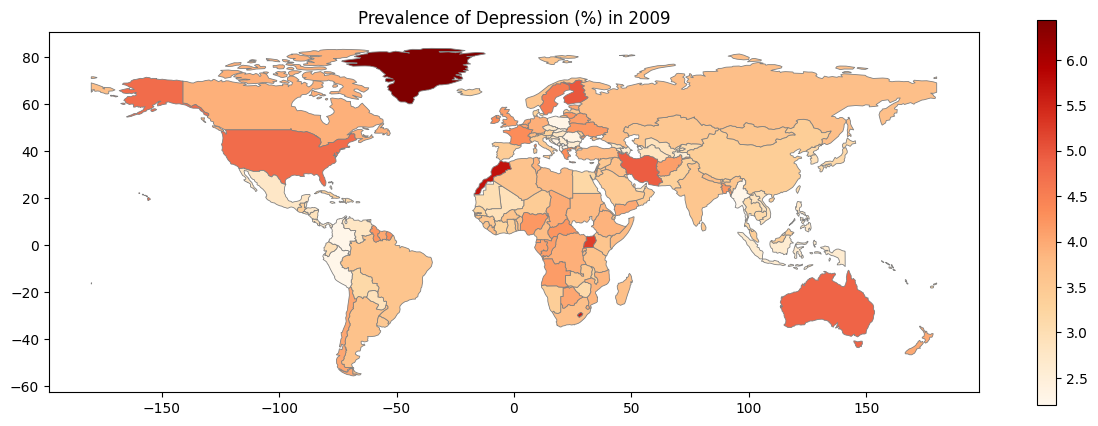

In [207]:
fig, ax = plt.subplots(figsize=(15, 5))

merged.plot(column='Depression (%)', cmap='OrRd', linewidth=0.6, ax=ax, edgecolor='0.5', legend=True)

plt.title('Prevalence of Depression (%) in 2009')
plt.show()

In [208]:
df.describe()

,index,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,3233.500000,2003.500000,0.211644,0.719145,0.239998,3.989921,0.862278,3.497654,1.585821
std,1867.295103,8.078372,0.044253,0.171589,0.158141,1.167526,0.460679,0.655859,0.860283
min,0.000000,1990.000000,0.146902,0.314535,0.073908,2.023393,0.383650,2.139903,0.446940
25%,1616.750000,1996.750000,0.181529,0.615533,0.122387,3.188824,0.535064,3.005529,0.993685
50%,3233.500000,2003.500000,0.199563,0.693134,0.182525,3.554373,0.726430,3.499606,1.479936
75%,4850.250000,2010.250000,0.236366,0.835063,0.292667,4.682163,0.940157,3.912381,1.867834
max,6467.000000,2017.000000,0.375110,1.206597,0.943991,8.967330,3.452476,6.602754,5.474668


In [209]:
columns_of_interest = ['Schizophrenia (%)', 'Bipolar disorder (%)', 'Eating disorders (%)',
                       'Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)',
                       'Alcohol use disorders (%)']
max_column = df[columns_of_interest].idxmax(axis=1)
max_column = max_column.apply(lambda x: x[:-4])
df['Highest_Disorder'] = max_column

min_column = df[columns_of_interest].idxmin(axis=1)
min_column = min_column.apply(lambda x: x[:-4])
df['Lowest_Disorder'] = min_column

In [210]:
df.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Highest_Disorder,Lowest_Disorder
0,0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,Anxiety disorders,Eating disorders
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,Anxiety disorders,Eating disorders
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,Anxiety disorders,Eating disorders
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,Anxiety disorders,Eating disorders
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,Anxiety disorders,Eating disorders


In [211]:
world = gpd.read_file('dataset/natural_earth/ne_110m_admin_0_countries.shp')
merged = world.merge(df, how='left', left_on='BRK_A3', right_on='Code')

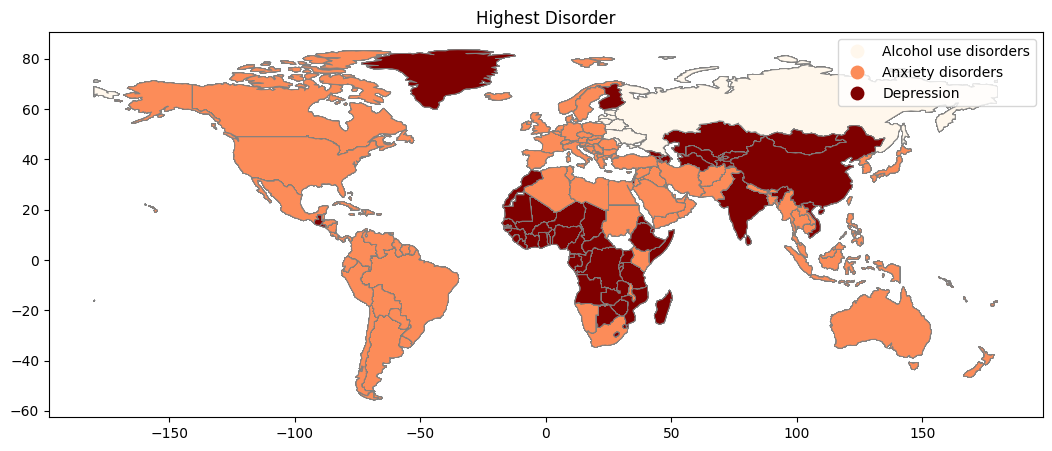

In [212]:
fig, ax = plt.subplots(figsize=(15, 5))

merged.plot(column='Highest_Disorder', cmap='OrRd', linewidth=0.6, ax=ax, edgecolor='0.5', legend=True)

plt.title('Highest Disorder')
plt.show()

In [213]:
world = gpd.read_file('dataset/natural_earth/ne_110m_admin_0_countries.shp')
merged = world.merge(df, how='left', left_on='BRK_A3', right_on='Code')

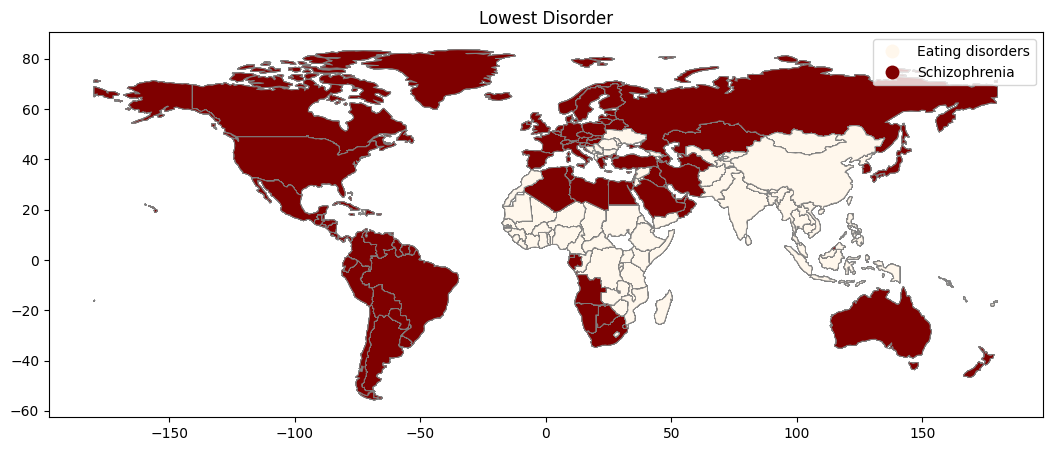

In [214]:
fig, ax = plt.subplots(figsize=(15, 5))

merged.plot(column='Lowest_Disorder', cmap='OrRd', linewidth=0.6, ax=ax, edgecolor='0.5', legend=True)

plt.title('Lowest Disorder')
plt.show()

In [215]:
df_hun = df[df['Entity'] == 'Hungary']

In [216]:
df_hun

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Highest_Disorder,Lowest_Disorder
2604,2604,Hungary,HUN,1990,0.199560,0.696293,0.199653,3.428446,0.649264,3.214377,2.431157,Anxiety disorders,Schizophrenia
2605,2605,Hungary,HUN,1991,0.199749,0.696926,0.198908,3.431757,0.650597,3.223918,2.469051,Anxiety disorders,Eating disorders
2606,2606,Hungary,HUN,1992,0.199929,0.697474,0.198409,3.434691,0.650335,3.226339,2.497066,Anxiety disorders,Eating disorders
2607,2607,Hungary,HUN,1993,0.200098,0.697942,0.197645,3.437227,0.650708,3.227410,2.516173,Anxiety disorders,Eating disorders
2608,2608,Hungary,HUN,1994,0.200244,0.698328,0.197432,3.439340,0.651145,3.224948,2.527159,Anxiety disorders,Eating disorders
2609,2609,Hungary,HUN,1995,0.200361,0.698627,0.197394,3.440880,0.652022,3.219006,2.531127,Anxiety disorders,Eating disorders
2610,2610,Hungary,HUN,1996,0.200468,0.698758,0.197666,3.441252,0.650561,3.193625,2.517999,Anxiety disorders,Eating disorders
2611,2611,Hungary,HUN,1997,0.200578,0.698686,0.198998,3.440124,0.647045,3.139432,2.484446,Anxiety disorders,Eating disorders
2612,2612,Hungary,HUN,1998,0.200694,0.698535,0.200204,3.438493,0.643296,3.073759,2.441802,Anxiety disorders,Eating disorders
2613,2613,Hungary,HUN,1999,0.200823,0.698441,0.201014,3.437399,0.639979,3.010566,2.401402,Anxiety disorders,Schizophrenia


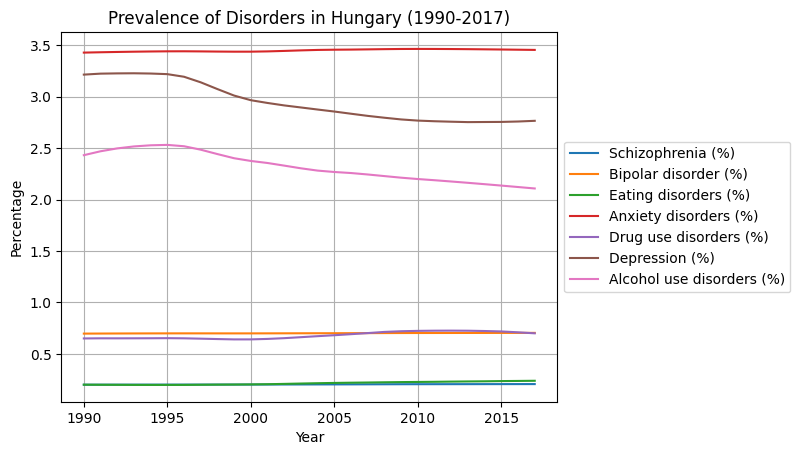

In [217]:
disorders = columns_of_interest

for disorder in disorders:
    plt.plot(df_hun['Year'], df_hun[disorder], label=disorder)

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Prevalence of Disorders in Hungary (1990-2017)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

plt.show()

In [218]:
eastern_block = ["Bulgaria", "Czech Republic", "Hungary", "Poland", "Romania", "Slovakia"]

In [219]:
df_east_block = df[df["Entity"].isin(eastern_block)]

In [220]:
df_east_block.head()

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Highest_Disorder,Lowest_Disorder
812,812,Bulgaria,BGR,1990,0.197678,0.625609,0.175711,3.564147,0.643869,2.769279,1.874531,Anxiety disorders,Eating disorders
813,813,Bulgaria,BGR,1991,0.197591,0.625936,0.174484,3.567368,0.643790,2.777570,1.873761,Anxiety disorders,Eating disorders
814,814,Bulgaria,BGR,1992,0.197490,0.626225,0.173255,3.570018,0.643185,2.784457,1.871572,Anxiety disorders,Eating disorders
815,815,Bulgaria,BGR,1993,0.197385,0.626461,0.171778,3.572054,0.642998,2.789242,1.868211,Anxiety disorders,Eating disorders
816,816,Bulgaria,BGR,1994,0.197286,0.626634,0.170713,3.573457,0.643189,2.792333,1.864116,Anxiety disorders,Eating disorders


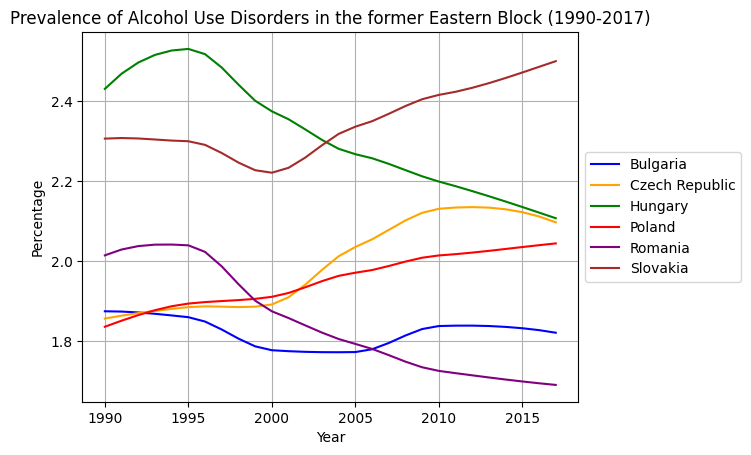

In [221]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

for i, country in enumerate(eastern_block):
    country_data = df_east_block[df_east_block["Entity"] == country]
    plt.plot(country_data['Year'], country_data["Alcohol use disorders (%)"], label=country, color=colors[i])

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Prevalence of Alcohol Use Disorders in the former Eastern Block (1990-2017)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

plt.show()

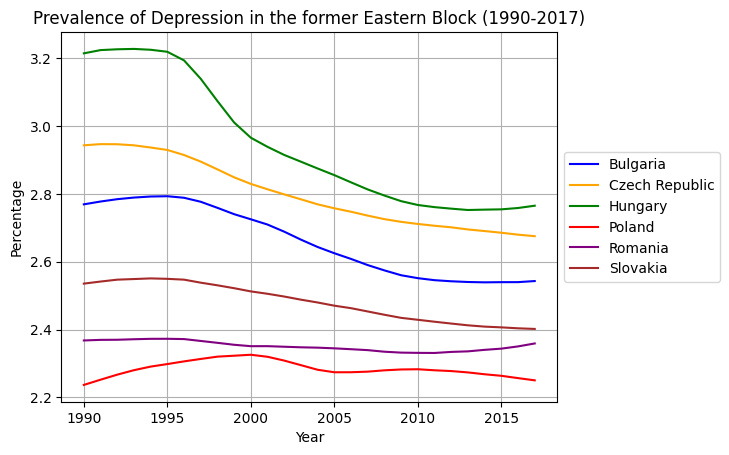

In [222]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

for i, country in enumerate(eastern_block):
    country_data = df_east_block[df_east_block["Entity"] == country]
    plt.plot(country_data['Year'], country_data["Depression (%)"], label=country, color=colors[i])

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Prevalence of Depression in the former Eastern Block (1990-2017)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)

plt.show()

In [223]:
df.dtypes

index                          int64
Entity                        object
Code                          object
Year                           int64
Schizophrenia (%)            float64
Bipolar disorder (%)         float64
Eating disorders (%)         float64
Anxiety disorders (%)        float64
Drug use disorders (%)       float64
Depression (%)               float64
Alcohol use disorders (%)    float64
Highest_Disorder              object
Lowest_Disorder               object
dtype: object

In [224]:
df_disorders = df.drop(columns=['index', 'Highest_Disorder', 'Lowest_Disorder'])

In [225]:
df_disorders.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [226]:
df_disorders['Year'] = pd.to_datetime(df_disorders['Year'], format='%Y')

numeric_columns = df_disorders.select_dtypes(include=['float64', 'int64'])

diff_df = numeric_columns.groupby(df_disorders['Code']).agg(lambda x: x.max() - x.min())

max_diff_column = diff_df.idxmax(axis=1)
max_diff_value = diff_df.max(axis=1)

result_df = pd.DataFrame({'Biggest Change': max_diff_column, 'Value': max_diff_value})
print(result_df)

                 Biggest Change     Value
Code                                     
AFG      Drug use disorders (%)  0.899107
AGO   Alcohol use disorders (%)  0.111439
ALB   Alcohol use disorders (%)  0.197179
AND       Anxiety disorders (%)  0.076887
ARE      Drug use disorders (%)  1.112877
...                         ...       ...
WSM              Depression (%)  0.117666
YEM      Drug use disorders (%)  0.341080
ZAF      Drug use disorders (%)  0.369058
ZMB              Depression (%)  0.144805
ZWE              Depression (%)  0.152425

[196 rows x 2 columns]


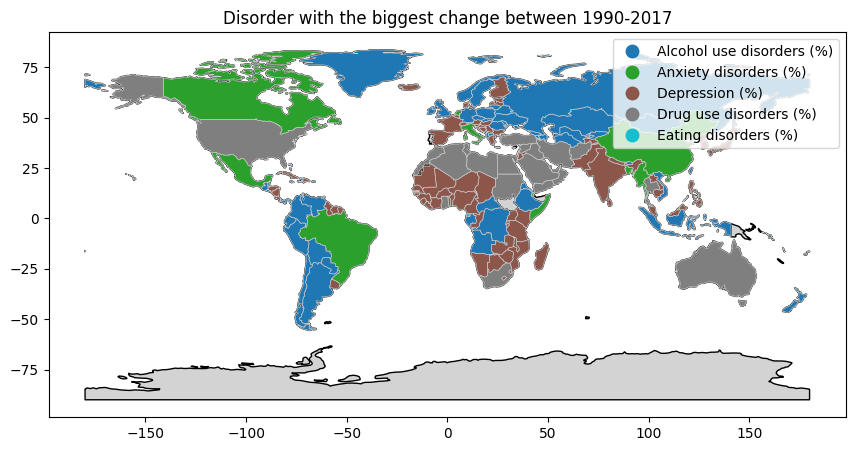

In [227]:
world = gpd.read_file('dataset/natural_earth/ne_110m_admin_0_countries.shp')
merged = world.merge(result_df, how='left', left_on='BRK_A3', right_on='Code')

fig, ax = plt.subplots(figsize=(15, 5))
world.plot(ax=ax, color='lightgrey', edgecolor='black')

merged.plot(column='Biggest Change', linewidth=0.5, ax=ax, edgecolor='0.8', legend=True)

plt.title('Disorder with the biggest change between 1990-2017')
plt.show()

In [228]:
df_disorders

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,AFG,1990-01-01,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991-01-01,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992-01-01,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993-01-01,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994-01-01,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,ZWE,2013-01-01,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
6464,Zimbabwe,ZWE,2014-01-01,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470
6465,Zimbabwe,ZWE,2015-01-01,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751
6466,Zimbabwe,ZWE,2016-01-01,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269


In [229]:
df_disorders_cleaned = df_disorders.dropna()

df_disorders_filtered = df_disorders_cleaned[df_disorders_cleaned["Year"].isin(["1990-01-01", "2017-01-01"])]

df_disorders_filtered_sorted = df_disorders_filtered.sort_values(by=["Code", "Year"])
df_disorders_filtered_sorted.reset_index(inplace=True)
df_disorders_filtered_sorted.drop(columns=['index'], inplace=True)

print(df_disorders_filtered_sorted)

           Entity Code       Year  Schizophrenia (%)  Bipolar disorder (%)  \
0     Afghanistan  AFG 1990-01-01           0.160560              0.697779   
1     Afghanistan  AFG 2017-01-01           0.166158              0.708089   
2          Angola  AGO 1990-01-01           0.166446              0.615109   
3          Angola  AGO 2017-01-01           0.172794              0.623904   
4         Albania  ALB 1990-01-01           0.193413              0.695013   
..            ...  ...        ...                ...                   ...   
387  South Africa  ZAF 2017-01-01           0.181937              0.636613   
388        Zambia  ZMB 1990-01-01           0.160836              0.601194   
389        Zambia  ZMB 2017-01-01           0.165866              0.605972   
390      Zimbabwe  ZWE 1990-01-01           0.161705              0.604537   
391      Zimbabwe  ZWE 2017-01-01           0.157963              0.611242   

     Eating disorders (%)  Anxiety disorders (%)  Drug use diso

C:\Users\helit\AppData\Local\Temp\ipykernel_6352\3380267401.py:3: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_disorders_filtered = df_disorders_cleaned[df_disorders_cleaned["Year"].isin(["1990-01-01", "2017-01-01"])]


In [230]:
df_disorders_filtered_sorted = df_disorders_filtered_sorted[df_disorders_filtered_sorted['Entity'] != 'World']

In [231]:
df_pivot = df_disorders_filtered_sorted.pivot(index=['Entity', 'Code'], columns='Year')

results = {}

for column in df_pivot.columns.levels[0]:
    if column not in ['Entity', 'Code']:
        difference = df_pivot[column]['2017-01-01'] - df_pivot[column]['1990-01-01']
        results[column] = difference

df_results = pd.DataFrame(results)
df_results.reset_index(inplace=True)

print(df_results)

             Entity Code  Schizophrenia (%)  Bipolar disorder (%)  \
0       Afghanistan  AFG           0.005598              0.010310   
1           Albania  ALB           0.007612              0.009467   
2           Algeria  DZA           0.004331              0.015794   
3    American Samoa  ASM          -0.003754              0.003306   
4           Andorra  AND          -0.002654             -0.001266   
..              ...  ...                ...                   ...   
190       Venezuela  VEN           0.001818              0.005498   
191         Vietnam  VNM           0.021927              0.013453   
192           Yemen  YEM           0.001825              0.005644   
193          Zambia  ZMB           0.005030              0.004778   
194        Zimbabwe  ZWE          -0.003742              0.006705   

     Eating disorders (%)  Anxiety disorders (%)  Drug use disorders (%)  \
0                0.005287               0.053651                0.796852   
1                0.

In [232]:
numeric_columns = df_results.columns[2:]
df_results[numeric_columns] = df_results[numeric_columns].apply(pd.to_numeric, errors='coerce')

max_increase_disorder = []
max_increase_value = []
max_decrease_disorder = []
max_decrease_value = []

for index, row in df_results.iterrows():
    max_increase_disorder.append(row[2:].idxmax())
    max_increase_value.append(row[2:].max())
    max_decrease_disorder.append(row[2:].idxmin())
    max_decrease_value.append(row[2:].min())

df_max_changes = pd.DataFrame({
    'Entity': df_results['Entity'],
    'Code': df_results['Code'],
    'Max Increase Disorder': max_increase_disorder,
    'Max Increase Value': max_increase_value,
    'Max Decrease Disorder': max_decrease_disorder,
    'Max Decrease Value': max_decrease_value
})

print(df_max_changes)

             Entity Code      Max Increase Disorder  Max Increase Value  \
0       Afghanistan  AFG     Drug use disorders (%)            0.796852   
1           Albania  ALB  Alcohol use disorders (%)            0.128490   
2           Algeria  DZA     Drug use disorders (%)            0.416386   
3    American Samoa  ASM      Anxiety disorders (%)            0.059879   
4           Andorra  AND  Alcohol use disorders (%)            0.068264   
..              ...  ...                        ...                 ...   
190       Venezuela  VEN             Depression (%)            0.042735   
191         Vietnam  VNM  Alcohol use disorders (%)            0.238712   
192           Yemen  YEM     Drug use disorders (%)            0.341080   
193          Zambia  ZMB             Depression (%)            0.076536   
194        Zimbabwe  ZWE             Depression (%)            0.152425   

         Max Decrease Disorder  Max Decrease Value  
0    Alcohol use disorders (%)           -0.01

In [233]:
numeric_columns = df_results.columns[2:]
df_results[numeric_columns] = df_results[numeric_columns].apply(
    pd.to_numeric, errors="coerce"
)

max_increase_disorder = []
max_increase_value = []
max_decrease_disorder = []
max_decrease_value = []

for index, row in df_results.iterrows():
    max_increase = row[2:].max()
    max_decrease = row[2:].min()
    if max_increase < 0:
        max_increase_disorder.append("---")
        max_increase_value.append(0)
    else:
        max_increase_disorder.append(row[2:].idxmax())
        max_increase_value.append(max_increase)

    if max_decrease > 0:
        max_decrease_disorder.append("---")
        max_decrease_value.append(0)
    else:
        max_decrease_disorder.append(row[2:].idxmin())
        max_decrease_value.append(max_decrease)

df_max_changes = pd.DataFrame(
    {
        "Entity": df_results["Entity"],
        "Code": df_results["Code"],
        "Max Increase Disorder": max_increase_disorder,
        "Max Increase Value": max_increase_value,
        "Max Decrease Disorder": max_decrease_disorder,
        "Max Decrease Value": max_decrease_value,
    }
)

print(df_max_changes)

             Entity Code      Max Increase Disorder  Max Increase Value  \
0       Afghanistan  AFG     Drug use disorders (%)            0.796852   
1           Albania  ALB  Alcohol use disorders (%)            0.128490   
2           Algeria  DZA     Drug use disorders (%)            0.416386   
3    American Samoa  ASM      Anxiety disorders (%)            0.059879   
4           Andorra  AND  Alcohol use disorders (%)            0.068264   
..              ...  ...                        ...                 ...   
190       Venezuela  VEN             Depression (%)            0.042735   
191         Vietnam  VNM  Alcohol use disorders (%)            0.238712   
192           Yemen  YEM     Drug use disorders (%)            0.341080   
193          Zambia  ZMB             Depression (%)            0.076536   
194        Zimbabwe  ZWE             Depression (%)            0.152425   

         Max Decrease Disorder  Max Decrease Value  
0    Alcohol use disorders (%)           -0.01

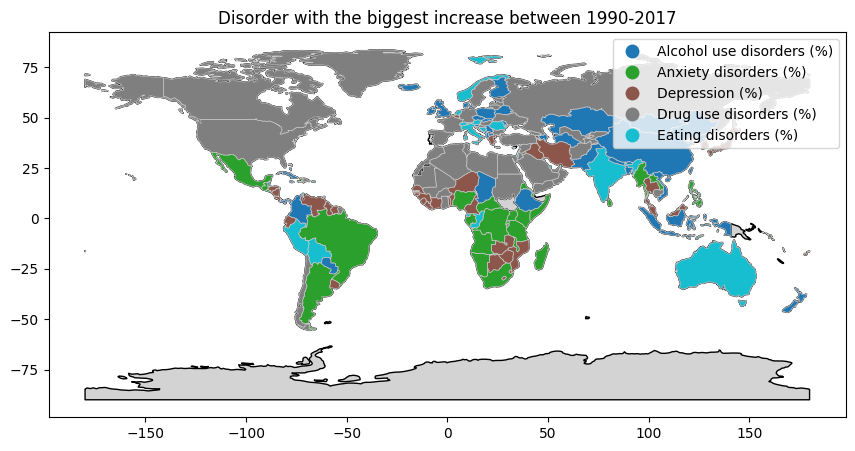

In [234]:
world = gpd.read_file('dataset/natural_earth/ne_110m_admin_0_countries.shp')
merged = world.merge(df_max_changes, how='left', left_on='BRK_A3', right_on='Code')

fig, ax = plt.subplots(figsize=(15, 5))
world.plot(ax=ax, color='lightgrey', edgecolor='black')

merged.plot(column='Max Increase Disorder', linewidth=0.5, ax=ax, edgecolor='0.8', legend=True)

plt.title('Disorder with the biggest increase between 1990-2017')
plt.show()

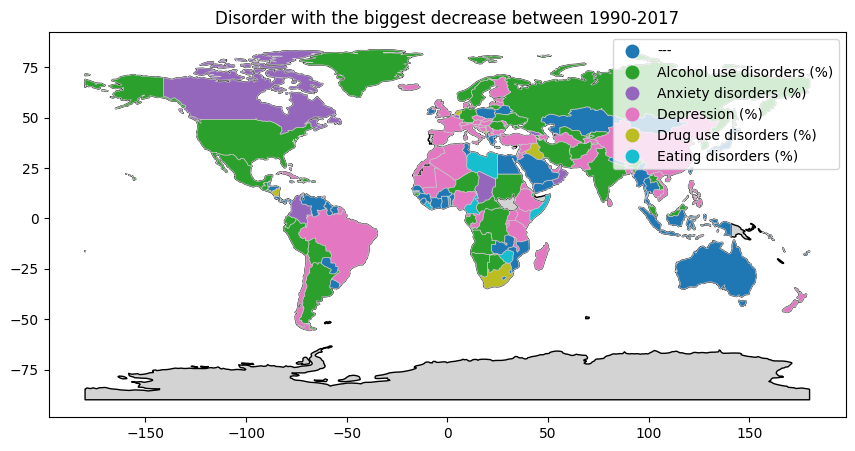

In [235]:
world = gpd.read_file('dataset/natural_earth/ne_110m_admin_0_countries.shp')
merged = world.merge(df_max_changes, how='left', left_on='BRK_A3', right_on='Code')

fig, ax = plt.subplots(figsize=(15, 5))
world.plot(ax=ax, color='lightgrey', edgecolor='black')

merged.plot(column='Max Decrease Disorder', linewidth=0.5, ax=ax, edgecolor='0.8', legend=True)

plt.title('Disorder with the biggest decrease between 1990-2017')
plt.show()

In [236]:
df_pivot

Schizophrenia (%)            Bipolar disorder (%)  \
Year                       1990-01-01 2017-01-01           1990-01-01   
Entity         Code                                                     
Afghanistan    AFG           0.160560   0.166158             0.697779   
Albania        ALB           0.193413   0.201025             0.695013   
Algeria        DZA           0.193582   0.197913             0.802893   
American Samoa ASM           0.252311   0.248557             0.464999   
Andorra        AND           0.266166   0.263512             0.964597   
...                               ...        ...                  ...   
Venezuela      VEN           0.203719   0.205537             0.774305   
Vietnam        VNM           0.222736   0.244663             0.539200   
Yemen          YEM           0.169866   0.171691             0.730038   
Zambia         ZMB           0.160836   0.165866             0.601194   
Zimbabwe       ZWE           0.161705   0.157963             0.604537   

                               Eating disorders (%)             \
Year                2017-01-01           1990-01-01 2017-01-01   
Entity         Code                                              
Afghanistan    AFG    0.708089             0.101855   0.107142   
Albania        ALB    0.704480             0.130782   0.174046   
Algeria        DZA    0.818687             0.189024   0.213612   
American Samoa ASM    0.468305             0.187677   0.177808   
Andorra        AND    0.963331             0.585917   0.644559   
...                        ...                  ...        ...   
Venezuela      VEN    0.779803             0.272052   0.282690   
Vietnam        VNM    0.552653             0.083484   0.128466   
Yemen          YEM    0.735682             0.119498   0.132623   
Zambia         ZMB    0.605972             0.124028   0.142768   
Zimbabwe       ZWE    0.611242             0.138791   0.124443   

                    Anxiety disorders (%)            Drug use disorders (%)  \
Year                           1990-01-01 2017-01-01             1990-01-01   
Entity         Code                                                           
Afghanistan    AFG               4.828830   4.882481               1.677082   
Albania        ALB               3.327587   3.385245               0.497616   
Algeria        DZA               4.976553   5.065876               1.300832   
American Samoa ASM               3.255955   3.315834               0.745011   
Andorra        AND               5.242673   5.305375               0.851843   
...                                   ...        ...                    ...   
Venezuela      VEN               2.847420   2.866789               0.608859   
Vietnam        VNM               2.036842   2.066871               0.615661   
Yemen          YEM               4.833670   4.857207               1.073645   
Zambia         ZMB               3.543883   3.599714               0.515124   
Zimbabwe       ZWE               3.078261   3.110926               0.738720   

                               Depression (%)             \
Year                2017-01-01     1990-01-01 2017-01-01   
Entity         Code                                        
Afghanistan    AFG    2.473934       4.071831   4.136347   
Albania        ALB    0.517614       2.139903   2.208414   
Algeria        DZA    1.717218       3.732597   3.661094   
American Samoa ASM    0.772801       2.944230   2.939668   
Andorra        AND    0.910066       3.768135   3.729532   
...                        ...            ...        ...   
Venezuela      VEN    0.645770       2.771849   2.814584   
Vietnam        VNM    0.693534       2.919093   2.879450   
Yemen          YEM    1.414725       3.963537   4.012346   
Zambia         ZMB    0.515972       3.565275   3.641811   
Zimbabwe       ZWE    0.772648       3.040364   3.192789   

                    Alcohol use disorders (%)             
Year                               1990-01-01 2017-01-01  
Entity

In [237]:
differences = np.array(df_pivot["Schizophrenia (%)"]["2017-01-01"] - df_pivot["Schizophrenia (%)"]["1990-01-01"])

In [238]:
differences

array([ 5.5980e-03,  7.6120e-03,  4.3310e-03, -3.7540e-03, -2.6540e-03,
        6.3480e-03,  3.7180e-03,  3.6720e-03,  4.9220e-03,  2.8370e-03,
        1.1960e-03,  7.2540e-03, -4.6100e-04,  3.9770e-03,  1.3640e-03,
        5.1900e-04,  6.3660e-03, -1.0900e-04,  4.5410e-03,  3.2880e-03,
        2.6890e-03,  1.2797e-02,  6.2350e-03,  1.1244e-02,  1.1289e-02,
        4.9760e-03, -2.1760e-03,  4.7770e-03,  5.3500e-03, -7.7200e-04,
        1.7577e-02,  1.7290e-03,  1.6930e-03,  1.0821e-02, -8.0800e-04,
        4.9140e-03,  6.0120e-03,  1.9250e-02,  9.1950e-03,  5.3200e-04,
        3.5670e-03,  7.6320e-03,  1.8420e-03,  3.5260e-03,  1.4800e-03,
        1.4930e-03,  3.9510e-03, -2.5120e-03,  1.7835e-02,  1.6480e-03,
        4.3490e-03,  7.7810e-03,  6.1070e-03,  7.2960e-03,  9.9820e-03,
        3.1493e-02,  6.4540e-03,  7.7730e-03,  1.0551e-02,  6.1490e-03,
       -1.2694e-02,  2.3600e-04,  2.8660e-03,  1.2420e-03,  9.5200e-04,
        3.0920e-03,  7.6760e-03,  2.5180e-03, -4.7000e-05,  7.15

In [239]:
# It had to be sorted by Entity, it was sorted by Code
df_prepared = df_disorders_filtered_sorted.sort_values(by="Entity")

IndexError: index 195 is out of bounds for axis 0 with size 195

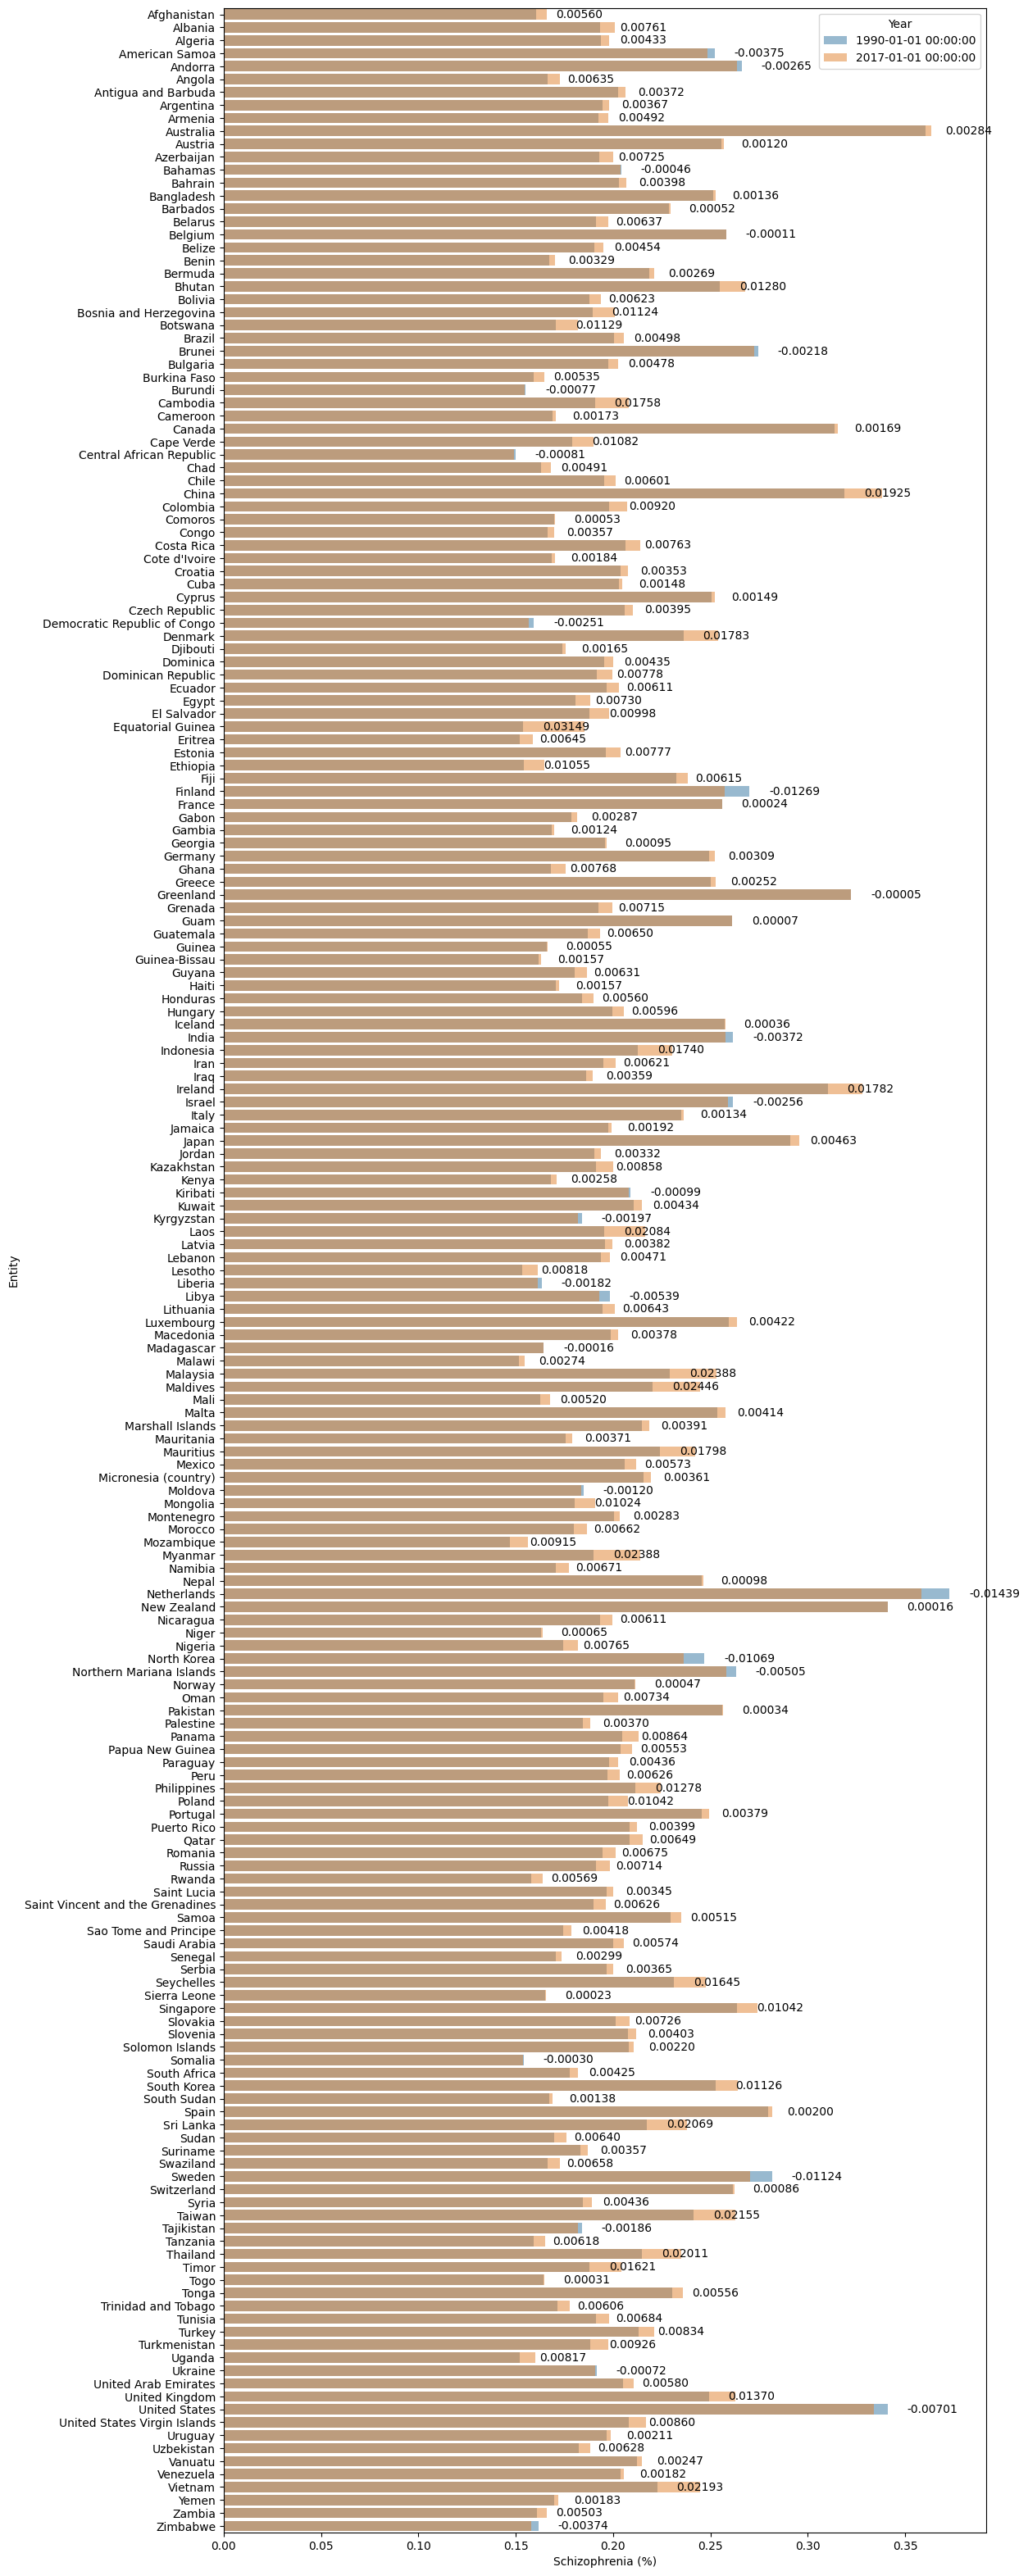

In [243]:
plt.figure(figsize=(12, 40))

ax = sns.barplot(
    data=df_prepared, 
    y='Entity', 
    x='Schizophrenia (%)', 
    hue='Year',
    alpha=0.5,
    dodge=False
)

for i, bar in enumerate(ax.patches):
    x = bar.get_width()
    offset = 0.01
    ax.text(x + offset, bar.get_y() + bar.get_height() / 2, f'{differences[i]:.5f}', ha='left', va='center', fontsize=10)


plt.xlim(0, 0.5)
plt.xlabel('Schizophrenia (%)')
plt.ylabel('Entity')
plt.title('Schizophrenia (%) by Entity')

plt.show()

In [244]:
df_prepared.shape

(390, 10)

In [245]:
differences.shape

(195,)